Vehicle Insurance Claims Prediction

The "Vehicle Insurance Claims Prediction" project was part of the "Allstate Claim Prediction Challenge" on Kaggle, held on 13-07-2011, with a focus on predicting claims payments. The goal was to develop predictive models to estimate insurance claims payments based on historical data and relevant features, using various machine learning techniques, data preprocessing methods, and feature engineering approaches to improve prediction accuracy.

Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

Import data:

In [2]:
train_data_1 = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\train_set.csv')
train_y = train_data_1['Claim_Amount']

#x_train, x_test, y_train, y_test = train_test_split(train_data_1, train_y, test_size=0.3)

test_data = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\test_set.csv')
example_entry = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\example_entry.csv')
test_data = test_data.merge(example_entry, on='Row_ID', how='left')
y_test_submission = test_data['Claim_Amount']

In [3]:
x_train = train_data_1.copy()
x_test = test_data.copy()

In [4]:
train_data = train_data_1.copy()

Exploratory Data Analysis:

In [3]:
print('Number of training samples: ', format(len(x_train),','))
print('Number of test samples: ', format(len(x_test), ','))
print('Train % : ', round(len(x_train) / (len(x_train) + len(x_test)), 3)*100,'%')
print('Test %  : ', round(len(x_test) / (len(x_train) + len(x_test)), 3)*100, '%')

Number of training samples:  13,184,290
Number of test samples:  4,314,865
Train % :  75.3 %
Test %  :  24.7 %


In [4]:
print('Features in training data: \n', train_data.columns)

Features in training data: 
 Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')


In [14]:
train_data[['Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year','Blind_Make', 'Blind_Model', 'Blind_Submodel']].head()

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel
0,1,3,2005,2005,K,K.78,K.78.2
1,2,2,2005,2003,Q,Q.22,Q.22.3
2,3,1,2005,1998,AR,AR.41,AR.41.1
3,3,1,2006,1998,AR,AR.41,AR.41.1
4,3,2,2005,2001,D,D.20,D.20.0


In [ ]:
train_data[['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'OrdCat']].head()

,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat
0,D,C,F,?,?,C,?,C,A,B,F,D,4
1,B,C,A,A,A,E,C,A,B,A,B,D,5
2,B,?,A,A,A,C,C,A,B,A,E,D,2
3,B,?,A,A,A,C,C,A,B,B,B,B,2
4,J,C,B,?,?,D,?,A,B,A,B,B,5


In [ ]:
train_data[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4']].head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4
0,1.270533,0.999418,0.588154,0.908351,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419
1,0.217950,0.567140,1.421206,0.485509,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419
2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419
3,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419
4,0.563454,1.863975,1.814591,1.838605,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419


In [54]:
Unique_HID = train_data['Household_ID'].nunique() / len(train_data['Household_ID'])
print("% of unique values in Household_ID: {:.2f}%".format(Unique_HID * 100))

% of unique values in Household_ID: 32.68%


In [26]:
print(train_data['Vehicle'].nunique())
np.sort(train_data['Vehicle'].unique())

28


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29], dtype=int64)

In [101]:
vehicle_stats = train_data.groupby(by='Vehicle')['Claim_Amount'].agg(['sum', 'count'])
vehicle_stats['% of occurrence'] = round((vehicle_stats['count'] / vehicle_stats['count'].agg('sum')) * 100, 4)
print(vehicle_stats)

                  sum    count  % of occurrence
Vehicle                                        
1        8.466029e+06  6363423          48.2652
2        5.238684e+06  3874475          29.3871
3        2.475997e+06  1755032          13.3115
4        1.097424e+06   714805           5.4216
5        3.898626e+05   277944           2.1081
6        1.548966e+05   114869           0.8713
7        6.690532e+04    47576           0.3609
8        2.371948e+04    19845           0.1505
9        1.525438e+04     8533           0.0647
10       5.131760e+03     3824           0.0290
11       2.089310e+03     1866           0.0142
12       1.386712e+03      931           0.0071
13       5.279128e+02      493           0.0037
14       0.000000e+00      273           0.0021
15       0.000000e+00      151           0.0011
16       1.034899e+02       96           0.0007
17       0.000000e+00       62           0.0005
18       0.000000e+00       30           0.0002
19       1.303231e+03       25          

<Axes: title={'center': 'Vehicle # within the household - Claim Amount'}, xlabel='Vehicle # within the household', ylabel='Sum of claim amount'>

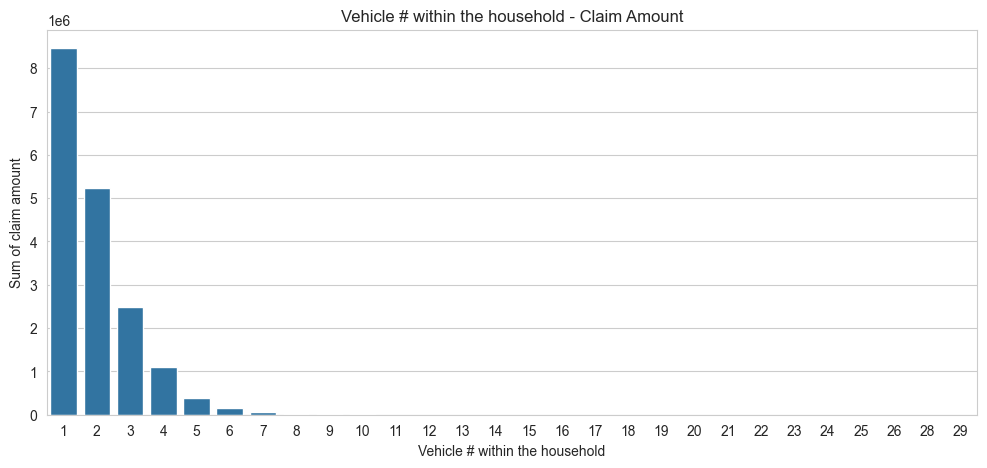

In [102]:
plt.figure(figsize=(12,5))
plt.title('Vehicle # within the household - Claim Amount')
plt.xlabel('Vehicle # within the household')
plt.ylabel('Sum of claim amount')
sns.barplot(train_data.groupby(by='Vehicle')['Claim_Amount'].agg('sum'))

In [73]:
train_data.columns

Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')

In [81]:
train_data[['Row_ID', 'Household_ID', 'Vehicle']].head(16)

,Row_ID,Household_ID,Vehicle
0,1,1,3
1,2,2,2
2,3,3,1
3,4,3,1
4,5,3,2
5,6,3,2
6,7,4,1
7,8,4,2
8,9,4,3
9,10,5,1


In [83]:
train_data[train_data['Household_ID']==5]

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
9,10,5,1,2005,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
10,11,5,1,2006,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
11,12,5,3,2005,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
12,13,5,3,2006,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
13,14,5,4,2005,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
14,15,5,4,2006,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0


In [19]:
train_data['Calendar_Year'].unique()

array([2005, 2006, 2007], dtype=int64)

In [27]:
print(train_data['Model_Year'].nunique())
np.sort(train_data['Model_Year'].unique())

29


array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009], dtype=int64)

In [30]:
print(train_data['Blind_Make'].nunique())
np.sort(train_data['Blind_Make'].unique())

75


array(['?', 'A', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
       'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
       'AV', 'AW', 'AX', 'AY', 'AZ', 'B', 'BA', 'BB', 'BC', 'BD', 'BF',
       'BG', 'BH', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS',
       'BT', 'BU', 'BV', 'BW', 'BY', 'BZ', 'C', 'CA', 'CB', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

In [29]:
print(train_data['Blind_Model'].nunique())
np.sort(train_data['Blind_Model'].unique())

1303


array(['?', 'A.2', 'A.3', ..., 'Z.45', 'Z.5', 'Z.8'], dtype=object)

In [31]:
print(train_data['Blind_Submodel'].nunique())
np.sort(train_data['Blind_Submodel'].unique())

2740


array(['?', 'A.2.0', 'A.3.0', ..., 'Z.45.0', 'Z.5.0', 'Z.8.0'],
      dtype=object)

In [32]:
print(train_data['Cat1'].nunique())
np.sort(train_data['Cat1'].unique())

11


array(['?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
      dtype=object)

In [35]:
print(train_data['OrdCat'].nunique())
train_data['OrdCat'].unique()

15


array(['4', '5', '2', '6', '3', '?', '1', '7', 4, 2, 5, 3, 1, 6, 7],
      dtype=object)

In [38]:
print(train_data['Var1'].nunique())
np.sort(train_data['Var1'].unique()[:10])

360


array([-0.7542818, -0.6337572, -0.3766379,  0.017076 ,  0.2179505,
        0.3224052,  0.4429298,  0.5634545,  0.7000491,  1.2705325])

In [40]:
print(train_data['NVCat'].nunique())
train_data['NVCat'].unique()

15


array(['M', 'O', 'F', 'N', 'J', 'L', 'B', 'H', 'A', 'G', 'K', 'I', 'E',
       'C', 'D'], dtype=object)

In [41]:
print(train_data['NVVar1'].nunique())
train_data['NVVar1'].unique()

29


array([-0.2315299,  2.0546834,  1.4831301,  3.1977899,  2.5119259,
        1.1401981,  0.9115767,  4.3408966,  6.62711  ,  1.7280815,
        0.7482758,  0.6258001,  2.7078872,  3.8836539,  5.2553821,
        4.9124498,  0.4543341,  3.6876929,  1.2926123,  4.05512  ,
        2.3404601,  0.5305412,  0.6829554,  1.8260621,  1.6390083,
        0.3400235,  5.4840031,  1.0154955,  2.8167543])

In [ ]:
sns.heatmap(train_data.corr())

In [109]:
train_data.groupby(by='Cat1')['Claim_Amount'].mean()

Cat1
?    0.793362
A    1.196787
B    1.475656
C    1.289835
D    1.313834
E    1.149625
F    1.425081
G    1.264641
H    1.269609
I    1.336931
J    1.178263
Name: Claim_Amount, dtype: float64

In [117]:
train_data['Vehicle'].dtype.name

'int64'

In [144]:
cat_feats = train_data[train_data.dtypes[train_data.dtypes == 'object'].index]

,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat,NVCat
0,K,K.78,K.78.2,D,C,F,?,?,C,?,C,A,B,F,D,4,M
1,Q,Q.22,Q.22.3,B,C,A,A,A,E,C,A,B,A,B,D,5,O
2,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,A,E,D,2,F
3,AR,AR.41,AR.41.1,B,?,A,A,A,C,C,A,B,B,B,B,2,F
4,D,D.20,D.20.0,J,C,B,?,?,D,?,A,B,A,B,B,5,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184285,BW,BW.156,BW.156.0,I,?,C,?,?,E,?,A,B,A,B,E,5,M
13184286,AJ,AJ.123,AJ.123.3,D,?,C,?,?,C,?,A,B,C,A,C,4,M
13184287,X,X.52,X.52.1,B,?,D,A,A,C,C,A,B,A,B,B,2,E
13184288,W,W.4,W.4.6,I,?,A,?,?,C,?,A,B,B,A,D,4,E


<Axes: >

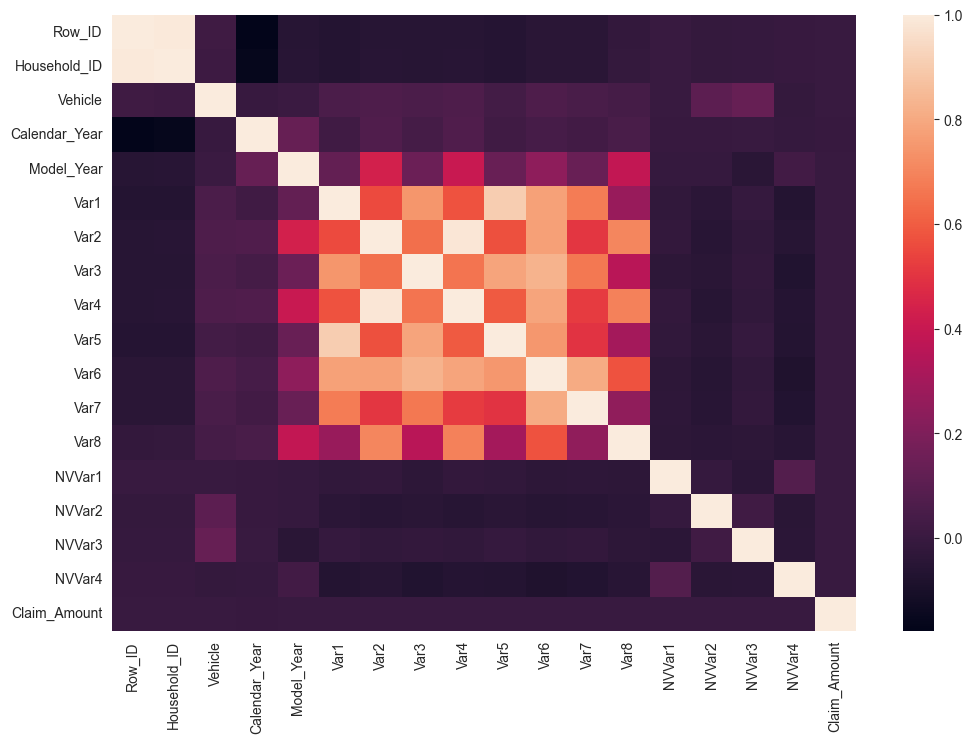

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data[train_data.dtypes[train_data.dtypes != 'object'].index].corr())

In [147]:
train_data[train_data.dtypes[train_data.dtypes != 'object'].index].corrwith(train_data['Claim_Amount'])

Row_ID           0.000633
Household_ID     0.000582
Vehicle          0.000965
Calendar_Year   -0.003552
Model_Year       0.000172
Var1            -0.000859
Var2            -0.001338
Var3            -0.001142
Var4            -0.001201
Var5            -0.000186
Var6            -0.001316
Var7            -0.001424
Var8            -0.001558
NVVar1           0.000487
NVVar2           0.001443
NVVar3           0.001943
NVVar4           0.000140
Claim_Amount     1.000000
dtype: float64

In [ ]:
sns.pairplot(train_data)

In [4]:
null_count = pd.DataFrame(train_data.isnull().sum(), columns=['Null_Count'])
null_count[null_count['Null_Count'] > 0]

,Null_Count
Cat12,28882


In [22]:
#Percentage of null values in the feature - "Cat12"
print("{:.2f}%".format(round(null_count[null_count['Null_Count'] > 0].loc['Cat12'][0] / len(train_data) * 100, 2)))

0.22%


In [54]:
print('Total number of data points: ', len(train_data))
print("Total number of data points with Non-Zero Claim Amounts: ", len(train_data[train_data['Claim_Amount']>0]))
print("Percentage of Non-Zero Claim Amounts: {:.2f}%".format(round(len(train_data[train_data['Claim_Amount']>0])/len(train_data), 4) * 100))
print("Percentage of data with Claim_Amount equals zero: {:.2f}%".format(round(len(train_data[train_data['Claim_Amount']==0]) / len(train_data) * 100, 2)))
print("Percentage of data for Claim_Amount between greater than 0 and less than 100: {:.2f}%".format(
      round((len(train_data[(train_data['Claim_Amount']>0) & (train_data['Claim_Amount']<100)]) / len(train_data)) * 100, 2)))
print("Percentage of data with Claim_Amount > 100: {:.2f}%".format(round(len(train_data[train_data['Claim_Amount']>=100]) / len(train_data), 4) * 100))

Total number of data points:  13184290
Total number of data points with Non-Zero Claim Amounts:  95605
Percentage of Non-Zero Claim Amounts: 0.73%
Percentage of data with Claim_Amount equals zero: 99.27%
Percentage of data for Claim_Amount between greater than 0 and less than 100: 0.47%
Percentage of data with Claim_Amount > 100: 0.26%


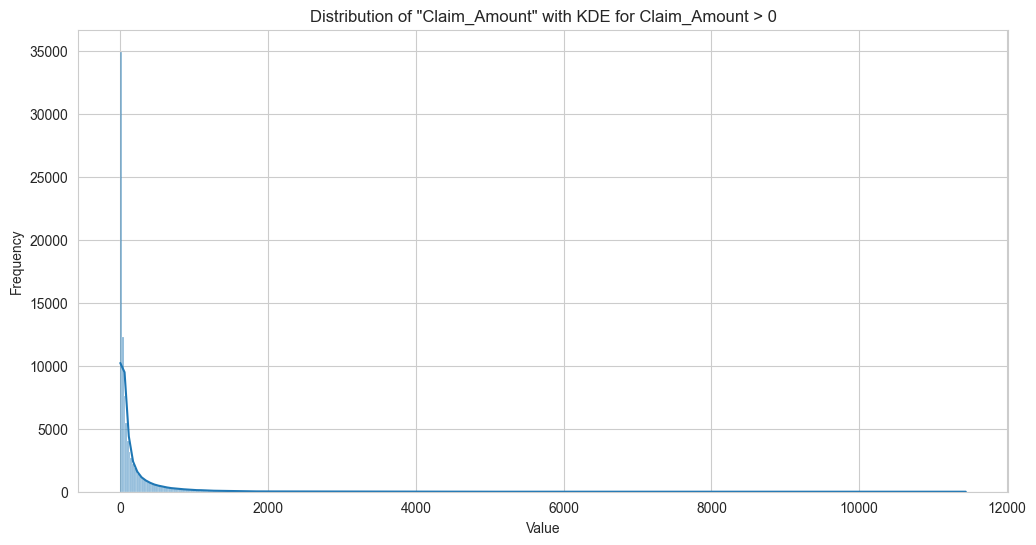

In [59]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data[train_data['Claim_Amount']>0]['Claim_Amount'], bins=500, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of "Claim_Amount" with KDE for Claim_Amount > 0')
plt.show()

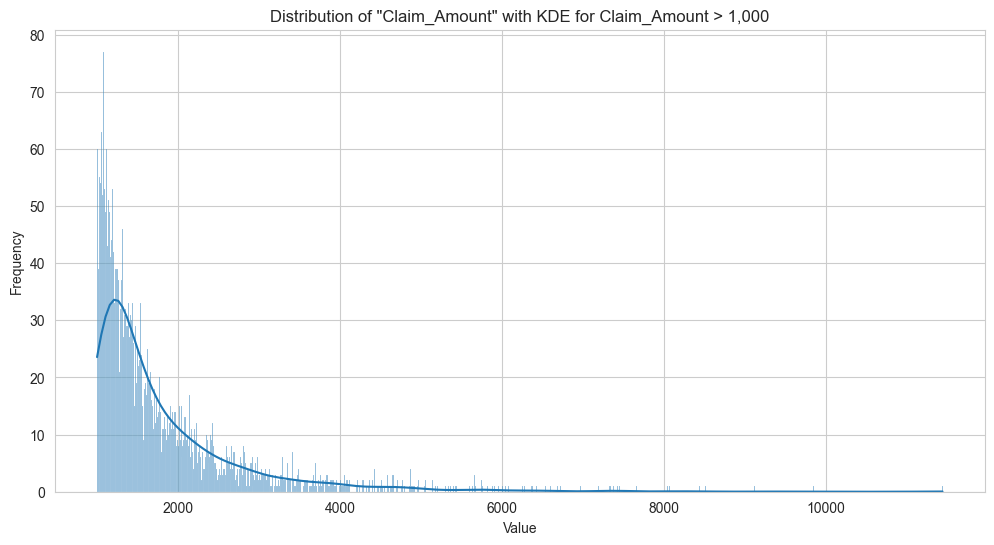

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data[train_data['Claim_Amount']>1000]['Claim_Amount'], bins=1000, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of "Claim_Amount" with KDE for Claim_Amount > 1,000')
plt.show()

Feature Engineering:

In [5]:
from sklearn.preprocessing import StandardScaler
import random

In [6]:
#train_data = train_data.drop(train_data[train_data['Claim_Amount']>100].index, axis=0)

x_train = x_train.drop(x_train[x_train['Claim_Amount']>100].index, axis=0)
x_test = x_test.drop(x_test[x_test['Claim_Amount']>100].index, axis=0)

In [7]:
#cat_features = train_data[train_data.dtypes[train_data.dtypes == 'object'].index].columns

cat_features = x_train[x_train.dtypes[x_train.dtypes == 'object'].index].columns

#train_data['Cat12'].fillna('NaN', inplace=True)
#for i in cat_features:
#    x = train_data[i].value_counts(normalize=True)
#    train_data[i] = train_data[i].map(x)

x_train['Cat12'].fillna('NaN', inplace=True)
for i in cat_features:
    x = x_train[i].value_counts(normalize=True)
    x_train[i] = x_train[i].map(x)

x_test['Cat12'].fillna('NaN', inplace=True)
for i in cat_features:
    x = x_test[i].value_counts(normalize=True)
    x_test[i] = x_test[i].map(x)

In [8]:
scaler = StandardScaler()

#train_scaled = scaler.fit_transform(train_data.drop(['Row_ID', 'Claim_Amount'], axis=1))
train_scaled = scaler.fit_transform(x_train.drop(['Row_ID', 'Claim_Amount'], axis=1))
test_scaled = scaler.transform(x_test.drop(['Row_ID', 'Claim_Amount'], axis=1))

In [9]:
y_train = x_train['Claim_Amount']
y_test = x_test['Claim_Amount']

Modeling:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score as r2
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import fmin, tpe, hp, Trials
from hyperopt.pyll import scope
from sklearn.model_selection import cross_val_score
from scipy import stats
import joblib

In [11]:
def gini(actual, pred): #, cmpcol = 0, sortcol = 1):
     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=float)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses
 
     giniSum -= (len(actual) + 1) / 2.
     return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

In [11]:
#x_train, x_test, y_train, y_test = train_test_split(train_scaled, train_data['Claim_Amount'], test_size=0.3)
#print('70% train data: ', len(x_train))
#x_train, x_test, y_train, y_test = train_test_split(train_scaled, train_data['Claim_Amount'], test_size=0.93)
#print('7% train data: ', len(x_train))

7% train data:  920538


1. Linear Regression model:

In [12]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [18]:
joblib.dump(lr_model, r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\lr_model_2.pkl')
#lr_model = joblib.load(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\lr_model_2.pkl')

['D:\\ML_Projects\\Vehicle_Insurance_Claims_Prediction\\models\\lr_model_2.pkl']

In [13]:
lr_pred = lr_model.predict(x_test)

print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, lr_pred),5))
print('Root Mean Squared Error: ', round(rmse(y_test, lr_pred),4))
print('Mean Squared Error: ', round(mse(y_test, lr_pred),2))

Normalized Gini Coefficient:  0.18897
Root Mean Squared Error:  2.6327
Mean Squared Error:  6.93


2. XGBoost model with Random Search CV:

In [25]:
xgb_base_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0)
params_dist = {
                'learning_rate': stats.loguniform(1e-5, 0.1),
                'max_depth': stats.randint(3, 10),
                'n_estimators': stats.randint(5, 301),
                'colsample_bytree': stats.uniform(0.1, 0.9),
                'subsample': stats.uniform(0.1, 0.9),
                'min_child_weight': stats.randint(1, 11),
                'num_boost_round': stats.randint(10, 101),
                'gamma': stats.uniform(0.01, 0.49)
             }

xgb_rcv_model = RandomizedSearchCV(estimator=xgb_base_model, param_distributions=params_dist, n_iter=5, scoring='neg_mean_squared_error', cv=3, verbose=3, n_jobs=-1)

xgb_rcv_model.fit(x_train, y_train)
xgb_model = xgb_rcv_model.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [28]:
joblib.dump(xgb_model, r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_4.pkl')
#xgb_model = joblib.load(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_4.pkl')

['D:\\ML_Projects\\Vehicle_Insurance_Claims_Prediction\\models\\xgb_model_4.pkl']

In [33]:
print('best score: ', xgb_rcv_model.best_score_)
print('best parameters: ')
xgb_rcv_model.best_params_

best score:  -7.446371227397993
best parameters: 


{'colsample_bytree': 0.5219531090590525,
 'gamma': 0.4469454567302962,
 'learning_rate': 0.022181943950479857,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 105,
 'num_boost_round': 41,
 'subsample': 0.2533282038160826}

In [27]:
xgb_pred = xgb_model.predict(x_test)

print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))

Normalized Gini Coefficient:  0.19549
Root Mean Squared Error:  2.6302
Mean Squared Error:  6.92


In [34]:
feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': train_data.drop(['Row_ID', 'Claim_Amount'], axis=1).columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)

,Feature,Importance
17,Cat11,0.066552
6,Blind_Submodel,0.054056
12,Cat6,0.052970
20,Var1,0.041974
31,NVVar3,0.040936
9,Cat3,0.039446
10,Cat4,0.037503
27,Var8,0.037499
4,Blind_Make,0.036962
7,Cat1,0.036661


3. XGBoost model with hyperopt for CV:

In [13]:
space = {
            'learning_rate': hp.loguniform('learning_rate', np.log(1e-5), np.log(0.1)),
            'max_depth': scope.int(hp.quniform('max_depth', 3, 9, 1)),
            'n_estimators': scope.int(hp.quniform('n_estimators', 5, 300, 1)),
            'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0),
            'subsample': hp.uniform('subsample', 0.1, 1.0),
            'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
            'num_boost_round': hp.quniform('num_boost_round', 10, 100, 10),
            'gamma': hp.uniform('gamma', 0.01, 0.5)
        }

def objective(params):
    xgb_base_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0, **params)
    mse_scores = -cross_val_score(xgb_base_model, x_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    return mse_scores.mean()

trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5, trials=trials)

best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

xgb_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0, **best_params)
xgb_model.fit(x_train, y_train)

100%|██████████| 5/5 [32:05<00:00, 385.03s/trial, best loss: 0.07970380053995939] 


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5614149402279104, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.4134558910885609,
             gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.014056564211823837,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=269, n_jobs=None,
             num_boost_round=100.0, ...)

In [29]:
joblib.dump(xgb_model, r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_hyperopt_2.pkl')
#xgb_model = joblib.load(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\xgb_model_hyperopt_2.pkl')

['D:\\ML_Projects\\Vehicle_Insurance_Claims_Prediction\\models\\xgb_model_hyperopt_2.pkl']

In [30]:
print('Best hyperparameters: ')
best_params

Best hyperparameters: 


{'colsample_bytree': 0.3758724456328686,
 'gamma': 0.1438822645745376,
 'learning_rate': 0.012311370751607964,
 'max_depth': 7,
 'min_child_weight': 7.0,
 'n_estimators': 223,
 'num_boost_round': 70.0,
 'subsample': 0.6467503615738432}

In [19]:
xgb_pred = xgb_model.predict(x_test)

print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))

Normalized Gini Coefficient:  0.20718
Root Mean Squared Error:  2.6295
Mean Squared Error:  6.91


In [35]:
xgb_pred = xgb_model.predict(x_test)

print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))

Normalized Gini Coefficient:  0.77839
Root Mean Squared Error:  0.0559
Mean Squared Error:  0.0


In [36]:
xgb_pred = xgb_model.predict(x_test)
print('Root Mean Squared Error: ', round(rmse(y_test, xgb_pred),4))
print('Mean Squared Error: ', round(mse(y_test, xgb_pred),2))
print('Normalized Gini Coefficient: ', round(gini_normalized(y_test, xgb_pred),5))

Root Mean Squared Error:  0.0294
Mean Squared Error:  0.0
Normalized Gini Coefficient:  nan


In [38]:
y_test.iloc[0] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print('0 - 0 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[0] = 0

y_test.iloc[int(len(y_test)/10)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/10), ' - 10 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/10)] = 0

y_test.iloc[int(len(y_test)/9)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/9), ' - 9 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/9)] = 0

y_test.iloc[int(len(y_test)/8)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/8), ' - 8 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/8)] = 0

y_test.iloc[int(len(y_test)/7)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/7), ' - 7 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/7)] = 0

y_test.iloc[int(len(y_test)/6)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/6), ' - 6 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/6)] = 0

y_test.iloc[int(len(y_test)/5)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/5), ' - 5 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/5)] = 0

y_test.iloc[int(len(y_test)/4)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/4), ' - 4 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/4)] = 0

y_test.iloc[int(len(y_test)/3)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/3), ' - 3 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/3)] = 0

y_test.iloc[int(len(y_test)/2)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)/2), ' - 2 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)/2)] = 0

y_test.iloc[int(len(y_test)-1)] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()
print(int(len(y_test)-1), ' - 1 : ', round(gini_normalized(y_test, xgb_pred),5))
y_test.iloc[int(len(y_test)-1)] = 0

0 - 0 :  0.74506
431486  - 10 :  0.73953
479429  - 9 :  0.50508
539358  - 8 :  0.17037
616409  - 7 :  -0.1774
719144  - 6 :  0.6288
862973  - 5 :  0.07924
1078716  - 4 :  -0.42617
1438288  - 3 :  0.84687
2157432  - 2 :  -0.15919
4314864  - 1 :  -0.10384


In [ ]:
#y_test.iloc[random.randint(0,len(x_test))] = x_train.loc[x_train['Claim_Amount'] > 0, 'Claim_Amount'].min()